#  DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

## Definizione di cluster

![cluster](cluster.png)

## Descrizione dell'algoritmo

![algoritmo](dbscan_alg.png)

## Implementazione

In [1]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from os.path import join

<Axes: >

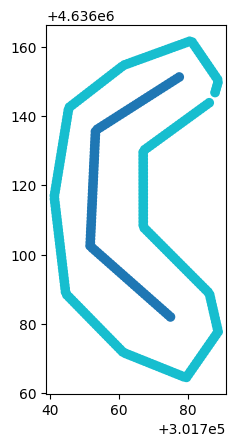

In [6]:
punti_gdf = gpd.read_file(join('data','cop.shp'))

# i punti nello shapefile importato sono già in un sitema di riferimento proiettato

eps, min_pts = 4, 4
n = punti_gdf.shape[0]
c = -1
labels = ['None']*n

for i, p in punti_gdf.iterrows():
    if labels[i] != 'None': # il punto è identificato col suo indice nel GeoDataFrame
        continue
    
    N = punti_gdf[ punti_gdf.distance(p['geometry']) < eps ] # filtro sulle righe del GeoDataFrame
    
    if len(N) < min_pts:
        labels[i] = 'Noise'
        continue

    c += 1
    labels[i] = str(c)
    
    S = set(list(N.index)) - set([i]) # la struttura dati set consente di gestire l'insieme dei seed n modo efficiente
    
    while len(S) > 0:
        q = S.pop()  # viene selezionato e rimosso un punto da S
        if labels[q] == 'Noise':
            labels[q] = str(c)
        if labels[q] != 'None':
            continue
        q_geom =  punti_gdf.loc[q, 'geometry']
        N = punti_gdf[ punti_gdf.distance(q_geom) < eps ]
        labels[q] = str(c)
        if len(N) < min_pts:
            continue
        S = S.union(set(list(N.index)) - set([q]))
        
punti_gdf['label'] = labels   # nuova colonna
punti_gdf.plot('label')  # un colore diverso per ogni etichetta